## Model Training

As summarised previously, the model will be trained using the cleaned and preprocessed dataset, and the intended X and y variables are as follows:

|**X:**
|-
|director
|property value of project
|stage number
|intended quoted hours for this stage
|**y:**
|expected total hours for that stage (i.e. adjusted quote suggestion)

In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
# Reading in preprocessed data
df = pd.read_csv("data/data.csv")

In [3]:
df.describe()

,Current Est Value,Quoted Hours,Predicted Total Hours
count,1.970000e+02,197.000000,197.000000
mean,1.059658e+06,14.903553,20.008629
std,4.228119e+05,10.720276,14.207910
min,3.740000e+05,1.000000,-4.000000
25%,7.471690e+05,8.000000,10.000000
50%,1.039425e+06,12.000000,16.900000
75%,1.306986e+06,18.000000,25.000000
max,2.063960e+06,66.000000,92.780000


In [4]:
# Splitting feature and target variables
X = df.drop("Predicted Total Hours", axis=1)
y = df["Predicted Total Hours"]
print(f"Feature data size: {X.shape}")
print(f"Target data size: {y.shape}")

Feature data size: (197, 8)
Target data size: (197,)


In [5]:
# Splitting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)
X_train.head()

,Current Est Value,Quoted Hours,Director_A,Director_B,Stage_1,Stage_2,Stage_3,Stage_4
82,810849,16.0,True,False,False,True,False,False
119,1700453,2.0,False,True,False,False,True,False
184,1003232,31.0,True,False,False,False,False,True
24,602199,9.0,False,True,True,False,False,False
132,836269,7.0,True,False,False,False,True,False


In [6]:
# Scaling the estimated property value
scaler = StandardScaler()
scaled_cols = ["Current Est Value"]
scaler.fit(X_train[scaled_cols])

X_train[scaled_cols] = scaler.transform(X_train[scaled_cols])
X_test[scaled_cols] = scaler.transform(X_test[scaled_cols])

X_train.head()

,Current Est Value,Quoted Hours,Director_A,Director_B,Stage_1,Stage_2,Stage_3,Stage_4
82,-0.578718,16.0,True,False,False,True,False,False
119,1.514721,2.0,False,True,False,False,True,False
184,-0.125997,31.0,True,False,False,False,False,True
24,-1.069718,9.0,False,True,True,False,False,False
132,-0.518899,7.0,True,False,False,False,True,False


### Linear Regression Model

In [7]:
# Fitting model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Making predictions to testing set
y_pred = model.predict(X_test)

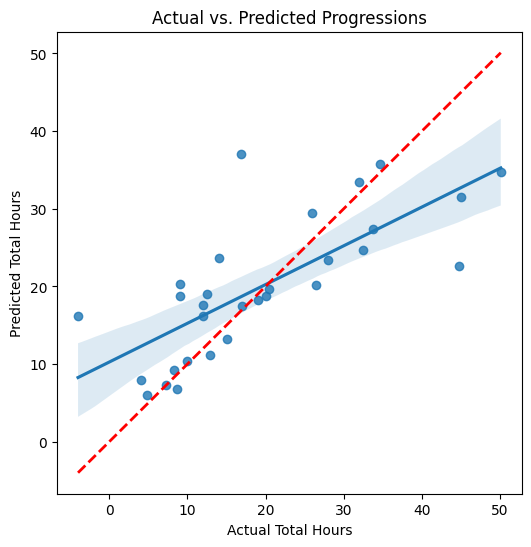

In [9]:
# Creating a scatter plot to look at the predicted outcome vs. actual outcome
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred, ax=ax)

# Add a line indicting perfect prediction
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Adding labels
ax.set_xlabel('Actual Total Hours')
ax.set_ylabel('Predicted Total Hours')
ax.set_title('Actual vs. Predicted Progressions')
plt.show()

### Results Analysis

In [10]:
# Printing the coefficients of model
pd.Series(model.coef_, index=model.feature_names_in_)

Current Est Value    0.657624
Quoted Hours         0.732249
Director_A          -0.448404
Director_B           0.448404
Stage_1              0.332508
Stage_2              1.914697
Stage_3             -4.347568
Stage_4              2.100362
dtype: float64

**Analysis of Coefficients**

**Director:**
This negative coefficient for director A and positive for director B suggests that there is a decrease in the target variable if it was A quoting, and increase if it was B quoting. This indicates that the model will predict a higher result for director B.

**Estimated property value:**
This positive coefficient indicates that higher estimated property value for the project is associated with higher total hours spent on the project. This makes sense as larger, more expensive projects typically require more work.

**Stage:**
Out of the four stages, Stage 2 and 4 has high positive coefficient, and also considerably higher compared with other scaled features (including property value, director and other stages). This indicates that being in these stages will contribute to a increase in the target variable (Total Predicted Hours), and that they are likely to be underquoted the most. On the other hand, Stage 3 has a large negative coefficient, suggests that for Stage 3, the predicted total hours spent will be decreased compared with other stages.

**Quoted Hours:**
The coefficient for quoted hours is around 0.73, which isn't the biggest coefficient. However, it's worth highlighting that this feature isn't scaled in the data, and ranges from 1 - 66 hours. As the feature isn't scaled, the quoted hours is actually the most critical factor for predicting the total hours. This makes sense, as the quoted hours can vary a lot depending on the client and project brief, and the overtime worked is likely to be associated with the magnitude of the number. e.g. if a project has been quoted for 2 hours, the overtime is unlikely to be more than 2 hours, however for a project that has been quoted for 20 hours, it is very likely that it will end up requiring 2 hours overtime or even more.

In [11]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred).round(2)} hours")

Mean Absolute Error: 6.16 hours


In [12]:
print(f"R squared score: {round(r2_score(y_test, y_pred), 2)}")

R squared score: 0.54


**Analysis of Model Performance**
**MAE:**
The MAE suggests that on average, the model's predictions are off by approximately 6.16 hours.

**R Squared Score:**
A value of 0.54 means that approximately 54% of the variance in the total hours can be explained by the model.


### Conclusions

Both model performance metrics suggest that the model's predictions are not extremely precise. It has captured some of the underlying patterns in the data and is able to provide a reasonable estimate for some observations, however there are definitely room for improvement.

This wasn't a surprise as the dataset is fairly small, with only 4 features.

Overall, the model's coefficients provide more a meaningful insight into the factors influencing the total hours spent on projects, highlighting the importance of different features.